<a href="https://colab.research.google.com/github/heejvely/Deep_learning/blob/main/%EC%B0%B8_%EA%B1%B0%EC%A7%93_%ED%8C%90%EB%8B%A8_%EC%9E%A5%EC%B9%98_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 로지스틱 회귀

- 참과 거짓 중에 하나를 내놓는 과정은 로지스틱회귀(logistic regression)의 원리를 거쳐 이루어짐.
- 로직스틱 회귀는 선형 회귀와 마찬가지로 적절한 선을 그리며, 참과 거짓 사이를 구분하는 s자 형태의 선을 그어줌.

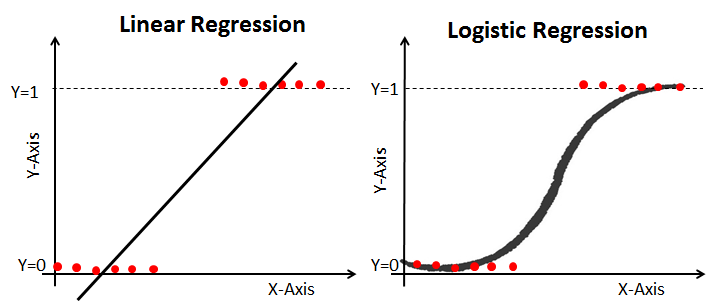

## 시그모이드 함수

- a는 그래프의 경사도를 의미함.
- a값이 커지면 경사가 커지고 a값이 작아지면 경사가 작아짐
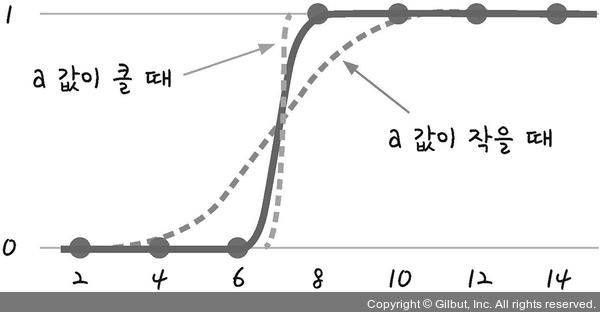

- b는 그래프의 좌우 이동의 의미함.

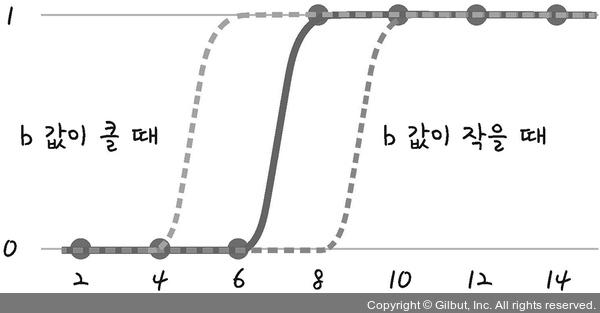

- a와 b의 값에 따라 오차도 변함.
- a값에 따라 변화하는 오차 그래프

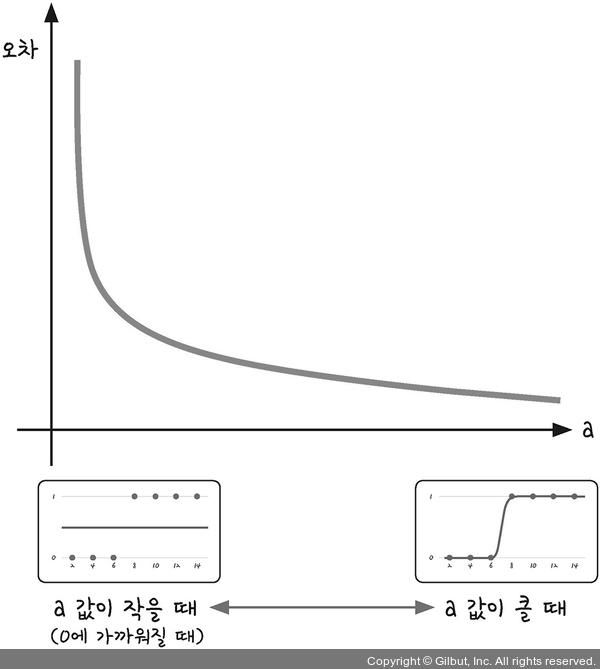

- a값이 작아지면 오차는 무한대로 커짐.
- 그러나 a값이 커진다고 해서 오차가 무한대로 커지지는 않음.
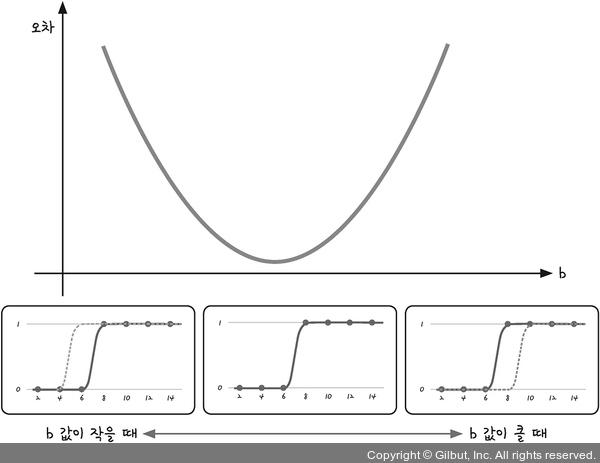

## 오차 공식

- 시그모이드 함수에서 a와 b의 값을 구하는 방법 = 경사하강법
- 경사하강법은 오차를 구한 다음 오차가 작은쪽으로 이동시키는 법
- 로그 함수를 이용해 오차를 구함.

## 로그함수

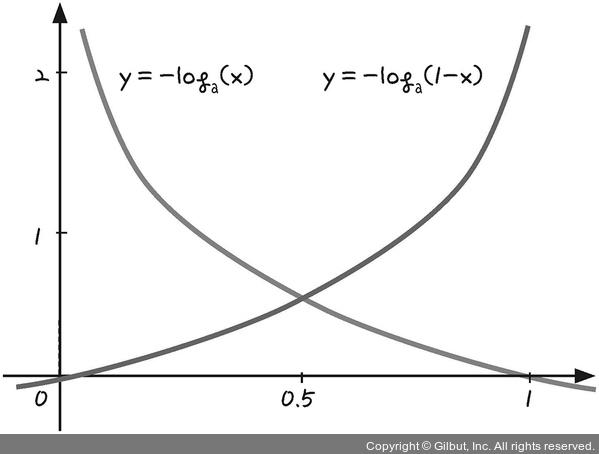

- 실제 값을 y_data라 할 때, 이 값이 1이면 B 부분이 없어짐.
- 반대로 0이면 A 부분이 없어짐.

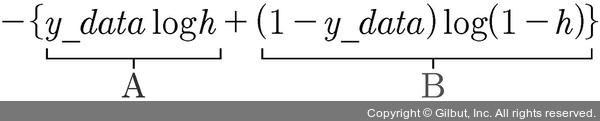

epoch = 0, 기울기 = -0.0500, 절편 = -0.0250
epoch = 0, 기울기 = -0.1388, 절편 = -0.0472
epoch = 0, 기울기 = -0.2268, 절편 = -0.0619
epoch = 0, 기울기 = 0.1201, 절편 = -0.0185
epoch = 0, 기울기 = 0.2374, 절편 = -0.0068
epoch = 0, 기울기 = 0.2705, 절편 = -0.0040
epoch = 0, 기울기 = 0.2860, 절편 = -0.0029
epoch = 1000, 기울기 = 1.4978, 절편 = -9.9401
epoch = 1000, 기울기 = 1.4940, 절편 = -9.9411
epoch = 1000, 기울기 = 1.4120, 절편 = -9.9547
epoch = 1000, 기울기 = 1.4949, 절편 = -9.9444
epoch = 1000, 기울기 = 1.4982, 절편 = -9.9440
epoch = 1000, 기울기 = 1.4984, 절편 = -9.9440
epoch = 1000, 기울기 = 1.4985, 절편 = -9.9440
epoch = 2000, 기울기 = 1.9065, 절편 = -12.9489
epoch = 2000, 기울기 = 1.9055, 절편 = -12.9491
epoch = 2000, 기울기 = 1.8515, 절편 = -12.9581
epoch = 2000, 기울기 = 1.9057, 절편 = -12.9514
epoch = 2000, 기울기 = 1.9068, 절편 = -12.9513
epoch = 2000, 기울기 = 1.9068, 절편 = -12.9513
epoch = 2000, 기울기 = 1.9068, 절편 = -12.9513


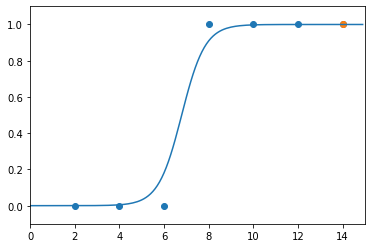

In [3]:
# 코딩으로 확인하는 로지스틱 회귀

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 공부 시간 x와 합격 여부 y의 리스트 만들기
data = [[2,0],[4,0],[6,0],[8,1],[10,1],[12,1],[14,1]]

x_data = [i[0] for i in data]
y_data = [i[1] for i in data]

# 그래프로 나타내기
plt.scatter(x_data, y_data)
plt.xlim(0,15)
plt.ylim(-.1,1.1)

# 기울기 a와 절편 b의 값 초기화
a = 0
b = 0

# 학습률 임의로 0.05 설정
lr = 0.05

# 시그모이드 함수 정의
def sigmoid(x):
  return 1 / (1 + np.e ** (-x))

# 1,000번 반복될 떄마다 각 x_data 값에 대한 현재의 a값, b값 출력
for i in range(2001):
  for x_data, y_data in data:
    # a에 관한 편미분. 앞서 정의한 sigmoid 함수 사용
    a_diff = x_data*(sigmoid(a * x_data + b) - y_data)
    # b에 관한 편미분
    b_diff = sigmoid(a * x_data + b) - y_data
    # a를 업데이트 하기 위해 a_diff에 학습률 lr을 곱한 값을 a에서 뺌
    a = a - lr * a_diff
    # b를 업데이트 하기 위해 b_diff에 학습률 lr을 곱한 값을 b에서 뺌
    b = b - lr * b_diff
    if i % 1000 == 0:
      print(f'epoch = {i}, 기울기 = {a:.4f}, 절편 = {b:.4f}')

# 앞서 구한 기울기와 절편을 이용해 그래프 그리기
plt.scatter(x_data, y_data)
plt.xlim(0,15)
plt.ylim(-.1, 1.1)
x_range = (np.arange(0,15,0.1))     # 그래프로 나타낼 x값의 범위 정하기
plt.plot(np.arange(0, 15, 0.1), np.array([sigmoid(a * x + b) for x in x_range]))
plt.show()